In [45]:
import sqlite3
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
path = './db/課題.sqlite'
con = sqlite3.connect(path)
cur = con.cursor()
sql_select_weather = "SELECT * FROM weather"
cur.execute(sql_select_weather)
data = cur.fetchall()
con.close()


In [47]:
# いらない特徴量を排除
df = pd.DataFrame(data, columns=["気圧", "海面気圧", "降水量", "1時間降水", "10分降水", "平均気温", "最高気温", "最低気温",
    "平均湿度", "最小湿度", "平均風速", "最大風速", "風向", "最大瞬間風速", "最大瞬間風向", "日照時間", "降雪", "積雪", "昼", "夜", "月", "日"])

# df.dtypes
exclude = ['風向', '最大瞬間風向', '昼', '夜']
object_columns = [col for col in df.columns if col not in exclude]
# 型を整える
for column in object_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# datetimeに直す
def create_datetime(row):
    return datetime(2023, int(row['月']), int(row['日']))
df["年月日"] = df.apply(create_datetime, axis=1)
df = df[["気圧", "降水量", "平均気温", "最高気温", "最低気温", "平均湿度", "年月日"]]
df

,気圧,降水量,平均気温,最高気温,最低気温,平均湿度,年月日
0,1013.5,NaN,7.4,12.1,2.3,59.0,2023-01-01
1,1013.4,0.0,6.9,11.1,4.3,51.0,2023-01-02
2,1012.8,NaN,6.5,10.9,3.0,45.0,2023-01-03
3,1012.8,NaN,5.9,10.5,2.1,48.0,2023-01-04
4,1016.4,NaN,6.2,11.0,2.9,36.0,2023-01-05
...,...,...,...,...,...,...,...
360,1020.2,NaN,8.8,13.3,5.2,52.0,2023-12-27
361,1020.1,NaN,8.1,11.4,6.4,53.0,2023-12-28
362,1016.0,NaN,8.8,13.4,4.1,59.0,2023-12-29
363,1014.9,NaN,9.8,14.6,5.9,60.0,2023-12-30


In [48]:
df.to_csv("./trash/weather.csv")

In [49]:
# NaNと雨の日を排除
sun_day = df[df["降水量"].isna()].drop("降水量", axis=1)
sun_day = sun_day.dropna(subset=["最高気温", "最低気温"])
# sun_day.isna().sum()
sun_day


,気圧,平均気温,最高気温,最低気温,平均湿度,年月日
0,1013.5,7.4,12.1,2.3,59.0,2023-01-01
2,1012.8,6.5,10.9,3.0,45.0,2023-01-03
3,1012.8,5.9,10.5,2.1,48.0,2023-01-04
4,1016.4,6.2,11.0,2.9,36.0,2023-01-05
5,1014.6,6.1,10.0,1.8,46.0,2023-01-06
...,...,...,...,...,...,...
359,1017.0,8.4,13.4,3.7,56.0,2023-12-26
360,1020.2,8.8,13.3,5.2,52.0,2023-12-27
361,1020.1,8.1,11.4,6.4,53.0,2023-12-28
362,1016.0,8.8,13.4,4.1,59.0,2023-12-29


In [50]:
spending = pd.read_csv("/Users/satoya01/Lectures/Lecture_2/ds_program/final/code/db/出費.csv")

In [51]:
# 日付を合わせ、出費が0の日を排除
dates_1 = sun_day["年月日"].tolist()
spending["年月日"] = pd.to_datetime(spending["年月日"])
spending = spending[spending["年月日"].isin(dates_1)]

spending = spending[spending["出費"] != 0]

dates_2 = spending["年月日"].tolist()
sun_day = sun_day[sun_day["年月日"].isin(dates_2)]

sun_day

,気圧,平均気温,最高気温,最低気温,平均湿度,年月日
3,1012.8,5.9,10.5,2.1,48.0,2023-01-04
5,1014.6,6.1,10.0,1.8,46.0,2023-01-06
8,1011.2,8.8,13.5,4.4,58.0,2023-01-09
10,1019.0,6.6,10.1,3.2,47.0,2023-01-11
21,1019.1,5.5,8.8,2.8,52.0,2023-01-22
27,1002.5,4.1,7.6,1.2,38.0,2023-01-28
29,1006.1,5.0,12.0,0.0,51.0,2023-01-30
31,1007.9,8.0,13.1,1.4,49.0,2023-02-01
33,1013.7,5.3,6.3,4.1,46.0,2023-02-03
45,1013.7,3.9,7.6,1.9,36.0,2023-02-15


In [52]:
# 年月日を主キーとして spending と sun_day データフレームをマージ
df = pd.merge(sun_day, spending, on='年月日', how='inner')

df.columns = ["Atmospheric Pressure", "Average Temperature", "Maximum Temperature", 
                "Minimum Temperature", "Average Humidity", "Date", "Expenditure"]

df["difference"] = df["Atmospheric Pressure"] - df["Atmospheric Pressure"].shift(1)
df["temperture difference"] = df["Maximum Temperature"] - df["Minimum Temperature"]
df

,Atmospheric Pressure,Average Temperature,Maximum Temperature,Minimum Temperature,Average Humidity,Date,Expenditure,difference,temperture difference
0,1012.8,5.9,10.5,2.1,48.0,2023-01-04,3370,NaN,8.4
1,1014.6,6.1,10.0,1.8,46.0,2023-01-06,4460,1.8,8.2
2,1011.2,8.8,13.5,4.4,58.0,2023-01-09,2808,-3.4,9.1
3,1019.0,6.6,10.1,3.2,47.0,2023-01-11,1805,7.8,6.9
4,1019.1,5.5,8.8,2.8,52.0,2023-01-22,5110,0.1,6.0
5,1002.5,4.1,7.6,1.2,38.0,2023-01-28,5490,-16.6,6.4
6,1006.1,5.0,12.0,0.0,51.0,2023-01-30,3650,3.6,12.0
7,1007.9,8.0,13.1,1.4,49.0,2023-02-01,6500,1.8,11.7
8,1013.7,5.3,6.3,4.1,46.0,2023-02-03,4296,5.8,2.2
9,1013.7,3.9,7.6,1.9,36.0,2023-02-15,1785,0.0,5.7


In [53]:
# 正規化
normalized_df = (df - df.mean()) / df.std()
normalized_df = normalized_df.drop("Date", axis=1)


/var/folders/_7/9vt2p_1s3zdcqrz15w05vp800000gn/T/ipykernel_26531/2701055697.py:2: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  normalized_df = (df - df.mean()) / df.std()


<Axes: >

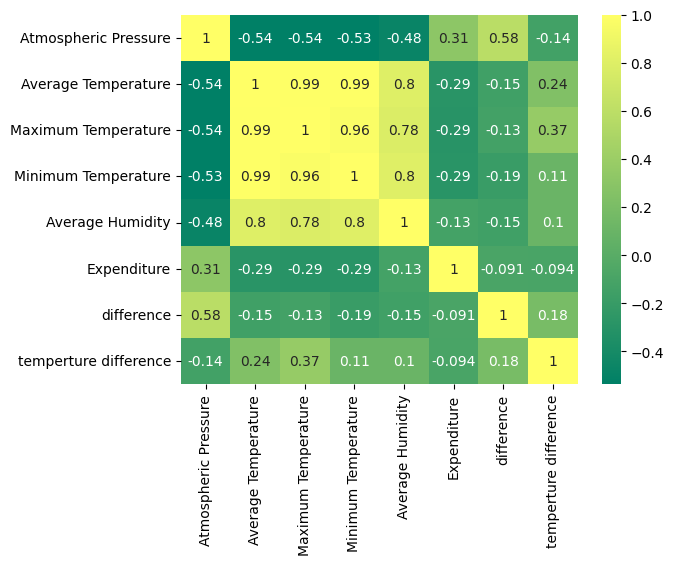

In [54]:
sns.heatmap(normalized_df.corr(), cmap="summer", annot=True)

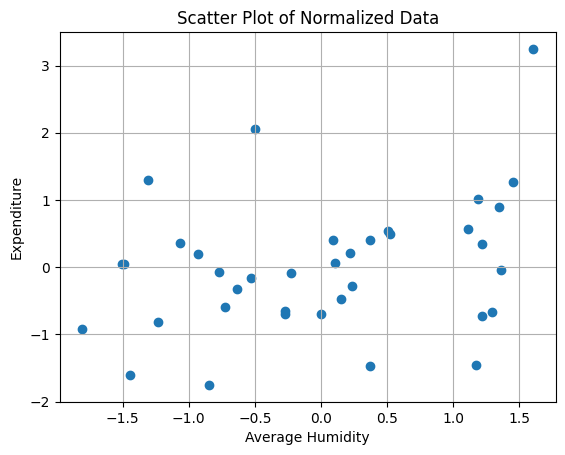

In [55]:
plt.scatter(normalized_df["Atmospheric Pressure"], normalized_df["Expenditure"])
plt.xlabel("Average Humidity")
plt.ylabel("Expenditure")
plt.title("Scatter Plot of Normalized Data")
plt.grid(True)
plt.show()